In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/delhi_aqi.csv')
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
df['co']=df['co']/1000

In [ ]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2.61688,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3.63159,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4.53949,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4.53949,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4.37927,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


breakpoints = {

    'pm2_5': [
        (0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200),
        (91, 120, 201, 300), (121, 250, 301, 400), (251, 5000, 401, 500)
    ],

    'pm10': [
        (0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200),
        (251, 350, 201, 300), (351, 430, 301, 400), (431, 5000, 401, 500)
    ],

    'no2': [
        (0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200),
        (181, 280, 201, 300), (281, 400, 301, 400), (401, 5000, 401, 500)
    ],

    'so2': [
        (0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200),
        (381, 800, 201, 300), (801, 1600, 301, 400), (1600, 5000, 401, 500)
    ],

    'co': [
        (0, 1.0, 0, 50), (1.1, 2.0, 51, 100), (2.1, 10, 101, 200),
        (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 5000, 401, 500)
    ],

    'o3': [
        (0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200),
        (169, 208, 201, 300), (209, 748, 301, 400), (749, 5000, 401, 500)
    ],

    'nh3': [
        (0, 200, 0, 50), (201, 400, 51, 100), (401, 800, 101, 200),
        (801, 1200, 201, 300), (1200, 1800, 301, 400), (1800, 5000, 401, 500)
    ]
}

def calculate_sub_index(conc, pollutant):
    """Calculates the individual sub-index for a single pollutant."""
    if pollutant not in breakpoints:
        return 0

    for (low_c, high_c, low_i, high_i) in breakpoints[pollutant]:
        if low_c <= conc and conc <= high_c:
            return low_i + (conc - low_c) * (high_i - low_i) / (high_c - low_c)
    return 500
def calculate_aqi_vectorized(row):
    pm25_si = calculate_sub_index(row['pm2_5'], 'pm2_5')
    pm10_si = calculate_sub_index(row['pm10'], 'pm10')
    no2_si  = calculate_sub_index(row['no2'], 'no2')
    so2_si = calculate_sub_index(row['so2'], 'so2')
    co_si = calculate_sub_index(row['co'], 'co')
    o3_si = calculate_sub_index(row['o3'], 'o3')
    nh3_si = calculate_sub_index(row['nh3'], 'nh3')

    return max(pm25_si, pm10_si, no2_si,so2_si,co_si,o3_si,nh3_si)

print(" CPCB Logic Loaded. Ready to calculate AQI.")

 CPCB Logic Loaded. Ready to calculate AQI.


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df.index = df.index + pd.DateOffset(years=2)

In [ ]:
# --- ADDING EXPLICIT TIME FEATURES (Cyclical Encoding) ---

# 1. Extract Numeric Time Features
df['Hour'] = df.index.hour
df['Month'] = df.index.month
# 2. Convert to Cyclical Features (The "Magic" Math)
# This teaches the model that Hour 23 is close to Hour 0, and Month 12 is close to Month 1

# Encode Hours (Period = 24)
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Encode Months (Period = 12)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# 3. Update Your Feature List
# Now the model takes Pollutants + Time as input
# IMPORTANT: Add these to your feature_list!
feature_list = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3',
                'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']

print("✅ Date & Time successfully encoded as cyclical features!")

✅ Date & Time successfully encoded as cyclical features!


In [ ]:



df['PM2.5_24hr_avg'] = df['pm2_5'].rolling(window=24,min_periods=1).mean()
df['PM10_24hr_avg']  = df['pm10'].rolling(window=24,min_periods=1).mean()
df['NO2_24hr_avg']   = df['no2'].rolling(window=24,min_periods=1).mean()
df['SO2_24hr_avg']   = df['so2'].rolling(window=24,min_periods=1).mean()
df['NH3_24hr_avg']   = df['nh3'].rolling(window=24,min_periods=1).mean()
df['CO_24hr_avg']    = df['co'].rolling(window=24,min_periods=1).mean()
df['O3_24hr_avg']    = df['o3'].rolling(window=24,min_periods=1).mean()

df['Calculated_AQI'] = df.apply(lambda row: calculate_aqi_vectorized({
    'pm2_5': row['PM2.5_24hr_avg'],
    'pm10': row['PM10_24hr_avg'],
    'no2': row['NO2_24hr_avg'],
    'so2': row['SO2_24hr_avg'],
    'co': row['CO_24hr_avg'],
    'o3': row['O3_24hr_avg'],
    'nh3': row['NH3_24hr_avg']
}), axis=1)

df['Hour'] = df.index.hour
df['Month'] = df.index.month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [11, 12, 1, 2] else ('Summer' if x in [3, 4, 5, 6] else 'Monsoon'))

print(f"Data Processed. Shape: {df.shape}")
print(df[['PM2.5_24hr_avg','NH3_24hr_avg', 'Calculated_AQI', 'Season']].head())

Data Processed. Shape: (18776, 23)
                     PM2.5_24hr_avg  NH3_24hr_avg  Calculated_AQI  Season
date                                                                     
2022-11-25 01:00:00      364.610000     28.630000      403.368370  Winter
2022-11-25 02:00:00      392.785000     34.835000      403.955720  Winter
2022-11-25 03:00:00      416.416667     39.603333      404.448358  Winter
2022-11-25 04:00:00      426.015000     41.735000      404.648449  Winter
2022-11-25 05:00:00      430.440000     42.710000      404.740695  Winter


In [ ]:
df.isnull().sum()

/tmp/ipython-input-1674365479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Calculated_AQI', data=df, palette='coolwarm')


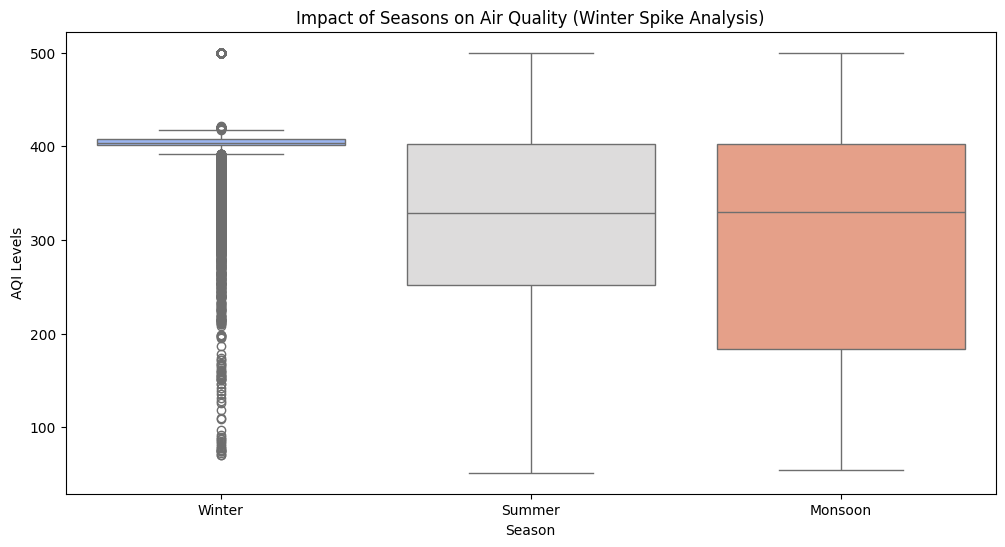

/tmp/ipython-input-1674365479.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='pm2_5', hue='Season', data=df, ci=None)


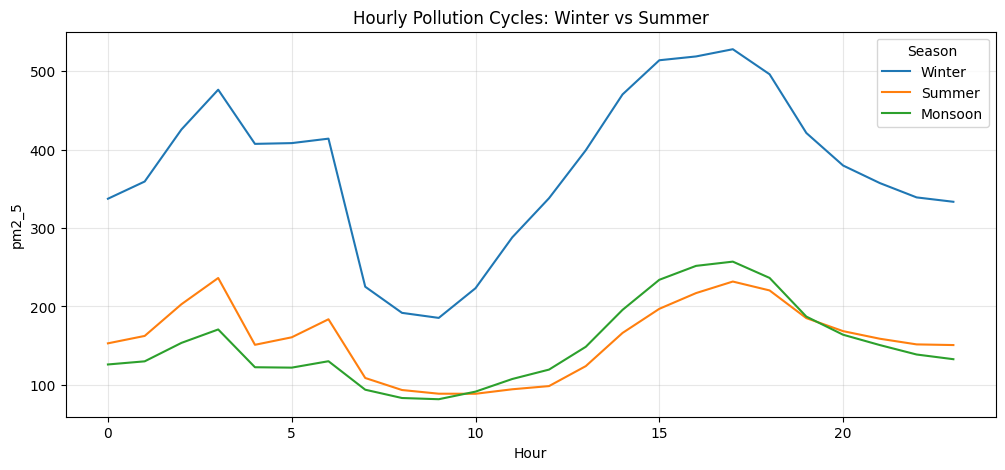

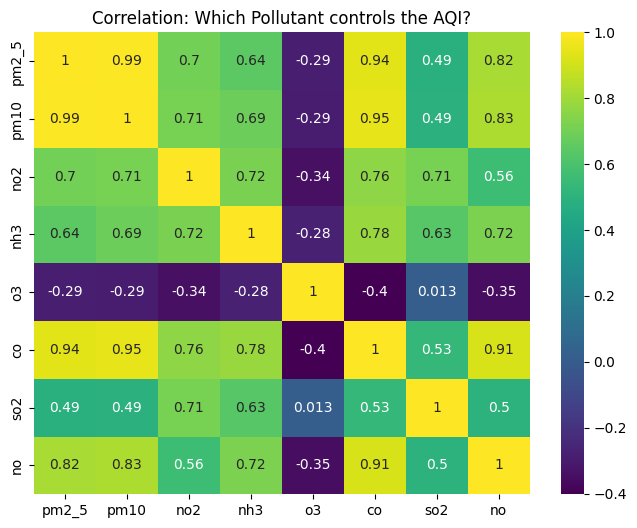

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Calculated_AQI', data=df, palette='coolwarm')
plt.title('Impact of Seasons on Air Quality (Winter Spike Analysis)')
plt.ylabel('AQI Levels')
plt.show()


plt.figure(figsize=(12, 5))
sns.lineplot(x='Hour', y='pm2_5', hue='Season', data=df, ci=None)
plt.title('Hourly Pollution Cycles: Winter vs Summer')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[['pm2_5', 'pm10', 'no2', 'nh3','o3','co','so2','no']].corr(), annot=True, cmap='viridis')
plt.title('Correlation: Which Pollutant controls the AQI?')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Updated features list with Time Embeddings
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3',
            'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']
dataset = df[features].values
pollutant_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
time_cols = ['Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']

# Combine them for the final feature list
features = pollutant_cols + time_cols

# 2. Apply Log Transform ONLY to Pollutants
# We work on a copy to avoid messing up the original df
df_processed = df.copy()

# Apply log1p (Log(1+x)) only to the chemical data
# This fixes the "Outlier" issue for MAE
df_processed[pollutant_cols] = np.log1p(df[pollutant_cols])

dataset = df_processed[features].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# --- 2. Create Sliding Windows (The "Time-Series" format) ---
# X = Past 24 hours (t-24 to t-1)
# y = Next hour (t)
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 24  # Look back 24 hours
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split into Train (80%) and Test (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"✅ LSTM Sequences Created. Training Shape: {X_train.shape}")

# --- 3. Build the LSTM Model ---
model = Sequential()
# Layer 1: LSTM with 50 units
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, len(features))))
model.add(Dropout(0.2)) # Prevents overfitting

# Layer 2: LSTM with 50 units
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Layer 3: Output Layer (3 Neurons = 3 Pollutants Predicted)
model.add(Dense(len(features)))

model.compile(optimizer='adam', loss='mean_squared_error')

# --- 4. Train the Model ---
# Epochs = 10 for speed (Increase to 50 for accuracy)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# --- 5. Predict & Invert Scaling ---
# Predict the future on Test Data
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled) # Convert back to normal numbers
# y_actual = scaler.inverse_transform(y_test)
y_pred_values = np.expm1(predictions)
y_actual = np.expm1(scaler.inverse_transform(y_test))
# --- 6. Visualize Prediction Accuracy ---


✅ LSTM Sequences Created. Training Shape: (15001, 24, 12)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 0.0556 - val_loss: 0.0080
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0134 - val_loss: 0.0053
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - loss: 0.0099 - val_loss: 0.0045
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - loss: 0.0086 - val_loss: 0.0039
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0076 - val_loss: 0.0038
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0069 - val_loss: 0.0037
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 0.0063 - val_loss: 0.0030
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0059 - val_loss: 0.0027
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0052 - val_loss: 0.0026
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import matplotlib.pyplot as plt
from datetime import timedelta

# Load resources (Using the specific model you requested)
model = tf.keras.models.load_model('model1.keras')


# Last known date from training (Update this if needed based on your dataset)
last_known_date = pd.to_datetime("2025-01-24 08:00:00")

print("\n" + "="*60)
print("📊 1. COMPONENT-WISE ACCURACY REPORT (Real Values)")
print("="*60)

y_pred_scaled = model.predict(X_test, verbose=0)

if y_test.ndim == 3:
    y_test_eval = y_test[:, 0, :]
else:
    y_test_eval = y_test

y_pred_log = scaler.inverse_transform(y_pred_scaled)
y_actual_log = scaler.inverse_transform(y_test_eval)

num_pollutants = 8
y_pred_values = y_pred_log.copy()
y_actual_values = y_actual_log.copy()

y_pred_values[:, :num_pollutants] = np.expm1(y_pred_values[:, :num_pollutants])
y_actual_values[:, :num_pollutants] = np.expm1(y_actual_values[:, :num_pollutants])

y_pred_values = np.maximum(y_pred_values, 0)

pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
score_df = pd.DataFrame(columns=['Pollutant', 'R2 Score', 'RMSE', 'MAE'])

for i, pol in enumerate(pollutants):
    act = y_actual_values[:, i]
    pred = y_pred_values[:, i]

    r2 = r2_score(act, pred)
    rmse = math.sqrt(mean_squared_error(act, pred))
    mae = mean_absolute_error(act, pred)

    score_df.loc[i] = [pol.upper(), f"{r2:.4f}", f"{rmse:.4f}", f"{mae:.4f}"]

print(score_df.to_string(index=False))

feature_list = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3',
                'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']

breakpoints = {

    'pm2_5': [
        (0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200),
        (91, 120, 201, 300), (121, 250, 301, 400), (251, 5000, 401, 500)
    ],

    'pm10': [
        (0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200),
        (251, 350, 201, 300), (351, 430, 301, 400), (431, 5000, 401, 500)
    ],

    'no2': [
        (0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200),
        (181, 280, 201, 300), (281, 400, 301, 400), (401, 5000, 401, 500)
    ],

    'so2': [
        (0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200),
        (381, 800, 201, 300), (801, 1600, 301, 400), (1600, 5000, 401, 500)
    ],

    'co': [
        (0, 1.0, 0, 50), (1.1, 2.0, 51, 100), (2.1, 10, 101, 200),
        (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 5000, 401, 500)
    ],

    'o3': [
        (0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200),
        (169, 208, 201, 300), (209, 748, 301, 400), (749, 5000, 401, 500)
    ],

    'nh3': [
        (0, 200, 0, 50), (201, 400, 51, 100), (401, 800, 101, 200),
        (801, 1200, 201, 300), (1200, 1800, 301, 400), (1800, 5000, 401, 500)
    ]
}


def calculate_sub_index(conc, pollutant):
    if pollutant not in breakpoints: return 0
    for (low_c, high_c, low_i, high_i) in breakpoints[pollutant]:
        if low_c <= conc <= high_c:
            return low_i + (conc - low_c) * (high_i - low_i) / (high_c - low_c)
    return 500

def predict_until_date(target_date_str, model, last_sequence, last_date):
    target_date = pd.to_datetime(target_date_str)
    current_date = last_date
    hours_diff = int((target_date - current_date).total_seconds() / 3600)

    if hours_diff <= 0: return None, "⚠️ Date must be in the future!"
    print(f"⏳ Generating Forecast for {hours_diff} hours ahead...")

    forecasted_data = []
    current_seq = last_sequence.copy()

    for _ in range(hours_diff + 24):
        pred = model.predict(current_seq, verbose=0)

        pred = np.clip(pred, 0, 0.99)

        forecasted_data.append(pred[0])
        new_step = pred.reshape(1, 1, 12)
        current_seq = np.concatenate([current_seq[:, 1:, :], new_step], axis=1)

    unscaled_data = scaler.inverse_transform(np.array(forecasted_data))
    real_values = unscaled_data.copy()
    real_values[:, :8] = np.expm1(real_values[:, :8])

    future_dates = [last_date + timedelta(hours=x+1) for x in range(len(real_values))]
    df_forecast = pd.DataFrame(real_values, columns=feature_list)
    df_forecast['Timestamp'] = future_dates

    return df_forecast, "Success"

print("\n" + "="*60)
print("📅 2. PREDICT AIR QUALITY FOR A FUTURE DATE")
print("="*60)

user_date_input = "2025-01-28"


SEQ_LENGTH = 24
last_window = X_test[-1].reshape(1, SEQ_LENGTH, 12)
forecast_df, status = predict_until_date(user_date_input, model, last_window, last_known_date)

if status == "Success":
    target_day_df = forecast_df[forecast_df['Timestamp'].dt.date == pd.to_datetime(user_date_input).date()]
    print(f"\n✅ Hourly Forecast for {user_date_input}:")
    print(target_day_df[['Timestamp', 'pm2_5', 'pm10', 'no2']].head(10).to_string(index=False))

print("\n" + "="*60)
print(f"🚀 3. PREDICTED AQI FOR {user_date_input}")
print("="*60)

if status == "Success":
    if not target_day_df.empty:
        avgs = target_day_df.mean(numeric_only=True)

        predicted_aqi = max(
            calculate_sub_index(min(avgs['pm2_5'], 600), 'pm2_5'),
            calculate_sub_index(min(avgs['pm10'], 600), 'pm10'),
            calculate_sub_index(avgs['no2'], 'no2'),
            calculate_sub_index(avgs['so2'], 'so2'),
            calculate_sub_index(avgs['co'], 'co'),
            calculate_sub_index(avgs['o3'], 'o3'),
            calculate_sub_index(avgs['nh3'], 'nh3')
        )

        print(f"🔮 PREDICTED AQI: {int(predicted_aqi)}")
        print(f"📉 Average PM2.5: {avgs['pm2_5']:.2f} µg/m³")
        print(f"📉 Average PM10:  {avgs['pm10']:.2f} µg/m³")
    else:
        print("❌ Error: No data generated for this specific date.")
else:
    print(status)


📊 1. COMPONENT-WISE ACCURACY REPORT (Real Values)
Pollutant R2 Score    RMSE     MAE
       CO   0.9185  0.8679  0.5110
       NO   0.8677 25.6985 13.2837
      NO2   0.8301 21.7113 12.8823
       O3   0.8600 23.2491 11.4906
      SO2   0.6975 28.7873 14.8086
    PM2_5   0.9302 60.1311 37.5714
     PM10   0.9291 72.6822 45.8286
      NH3   0.7601 15.1980  7.5265

📅 2. PREDICT AIR QUALITY FOR A FUTURE DATE
⏳ Generating Forecast for 88 hours ahead...

✅ Hourly Forecast for 2025-01-28:
          Timestamp      pm2_5       pm10       no2
2025-01-28 00:00:00 226.450317 276.240814 54.446098
2025-01-28 01:00:00 241.369812 294.874023 59.104893
2025-01-28 02:00:00 247.515045 301.726868 62.887856
2025-01-28 03:00:00 237.835556 288.088898 62.636292
2025-01-28 04:00:00 212.362335 256.298828 55.640354
2025-01-28 05:00:00 179.311508 218.492661 44.160446
2025-01-28 06:00:00 150.071274 187.391022 34.564880
2025-01-28 07:00:00 132.789276 170.366089 30.994766
2025-01-28 08:00:00 129.769531 169.158310 3

In [ ]:
feature_list = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3',
                'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']

print(f"✅ Feature list updated. Expecting {len(feature_list)} columns.")


✅ Feature list updated. Expecting 12 columns.


In [ ]:

print("\n" + "="*60)
print("📊 1. COMPONENT-WISE ACCURACY REPORT (Real Values)")
print("="*60)
model=tf.keras.models.load_model('/content/model1.keras')
y_pred_scaled = model.predict(X_test, verbose=0)

y_pred_log = scaler.inverse_transform(y_pred_scaled)
y_actual_log = scaler.inverse_transform(y_test)

# 3. Inverse Log (Crucial Step!)
# We only apply expm1 to the first 8 columns (Pollutants)
y_pred_values = y_pred_log.copy()
y_actual_values = y_actual_log.copy()
num_pollutants=8

y_pred_values[:, :num_pollutants] = np.expm1(y_pred_values[:, :num_pollutants])
y_actual_values[:, :num_pollutants] = np.expm1(y_actual_values[:, :num_pollutants])

# 4. Generate Score Report
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
score_df = pd.DataFrame(columns=['Pollutant', 'R2 Score', 'RMSE', 'MAE'])
for i, pol in enumerate(pollutants):
    act = y_actual_values[:, i]
    pred = y_pred_values[:, i]

    r2 = r2_score(act, pred)
    rmse = math.sqrt(mean_squared_error(act, pred))
    mae = mean_absolute_error(act, pred)

    score_df.loc[i] = [pol.upper(), f"{r2:.4f}", f"{rmse:.4f}", f"{mae:.4f}"]

print(score_df.to_string(index=False))


import pandas as pd
import numpy as np
from datetime import timedelta

# ==========================================
# PART 2: THE "FORECAST ENGINE" (Fixed with Safety Clip)
# ==========================================
feature_list = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3',
                'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']

def predict_until_date(target_date_str, model, last_sequence, last_date):
    target_date = pd.to_datetime(target_date_str)
    current_date = last_date
    hours_diff = int((target_date - current_date).total_seconds() / 3600)

    if hours_diff <= 0: return None, "⚠️ Date must be in the future!"
    print(f"⏳ Generating Forecast for {hours_diff} hours ahead...")

    forecasted_data = []
    current_seq = last_sequence.copy()

    for _ in range(hours_diff + 24):
        pred = model.predict(current_seq, verbose=0)


        # pred = np.clip(pred, 0,)

        forecasted_data.append(pred[0])
        new_step = pred.reshape(1, 1, 12)
        current_seq = np.concatenate([current_seq[:, 1:, :], new_step], axis=1)

    # Inverse Scale
    unscaled_data = scaler.inverse_transform(np.array(forecasted_data))

    # Inverse Log
    real_values = unscaled_data.copy()
    real_values[:, :8] = np.expm1(real_values[:, :8])

    future_dates = [current_date + timedelta(hours=x+1) for x in range(len(real_values))]
    df_forecast = pd.DataFrame(real_values, columns=feature_list)
    df_forecast['Timestamp'] = future_dates

    return df_forecast, "Success"


print("\n" + "="*60)
print("📅 2. PREDICT AIR QUALITY FOR A FUTURE DATE")
print("="*60)

last_known_date = df.index[-1]
# --- USER INPUT ---
user_date_input = "2025-01-28"
# ------------------

last_window = X_test[-1].reshape(1, SEQ_LENGTH, 12)
forecast_df, status = predict_until_date(user_date_input, model, last_window, last_known_date)

if status == "Success":
    target_day_df = forecast_df[forecast_df['Timestamp'].dt.date == pd.to_datetime(user_date_input).date()]

    print(f"\n✅ Hourly Forecast for {user_date_input}:")
    print(target_day_df[['Timestamp', 'pm2_5', 'pm10', 'no2']].head(10).to_string(index=False))


print("\n" + "="*60)
print(f"🚀 3. PREDICTED AQI FOR {user_date_input}")
print("="*60)

if status == "Success":
    if not target_day_df.empty:
        avgs = target_day_df.mean(numeric_only=True)

        predicted_aqi = max(
            calculate_sub_index(min(avgs['pm2_5'], 600), 'pm2_5'),
            calculate_sub_index(min(avgs['pm10'], 600), 'pm10'),
            calculate_sub_index(avgs['no2'], 'no2'),
            calculate_sub_index(avgs['so2'], 'so2'),
            calculate_sub_index(avgs['co'], 'co'),
            calculate_sub_index(avgs['o3'], 'o3'),
            calculate_sub_index(avgs['nh3'], 'nh3')
        )

        print(f"🔮 PREDICTED AQI: {int(predicted_aqi)}")
        print(f"📉 Average PM2.5: {avgs['pm2_5']:.2f} µg/m³")
        print(f"📉 Average PM10:  {avgs['pm10']:.2f} µg/m³")
    else:
        print("❌ Error: No data generated for this specific date.")
else:
    print(status)


📊 1. COMPONENT-WISE ACCURACY REPORT (Real Values)
Pollutant R2 Score    RMSE     MAE
       CO   0.9279  0.8161  0.5000
       NO   0.8770 24.7761 12.6867
      NO2   0.8665 19.2510 11.7390
       O3   0.8766 21.8263 10.9003
      SO2   0.7297 27.2101 14.1734
    PM2_5   0.9366 57.2852 36.2301
     PM10   0.9380 68.0040 43.5670
      NH3   0.7764 14.6697  7.2970

📅 2. PREDICT AIR QUALITY FOR A FUTURE DATE
⏳ Generating Forecast for 88 hours ahead...

✅ Hourly Forecast for 2025-01-28:
          Timestamp      pm2_5       pm10       no2
2025-01-28 00:00:00 403.222717 465.887390 60.621056
2025-01-28 01:00:00 423.437195 487.910614 61.651196
2025-01-28 02:00:00 472.240448 544.728516 65.827942
2025-01-28 03:00:00 545.550415 630.246643 72.067398
2025-01-28 04:00:00 624.506592 719.128784 79.089737
2025-01-28 05:00:00 670.198669 762.667969 86.048050
2025-01-28 06:00:00 646.513916 720.715637 93.094902
2025-01-28 07:00:00 560.002991 608.926880 98.982697
2025-01-28 08:00:00 454.253265 485.007477 9

⚙️ Preparing Hourly Data for Statistical Models...
✅ Data Ready. Train Shape: (15020, 1), Test Shape: (3756, 1)

📈 Training ARIMA Model on Hourly Data...


/tmp/ipython-input-2966878669.py:114: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly = df_hourly.fillna(method='ffill')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


⏳ ARIMA Forecasting...
✅ ARIMA Finished. RMSE: 319.30, R2: -0.970

🔮 Training Prophet Model on Hourly Data...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


✅ Prophet Finished. RMSE: 206.44, R2: 0.177

🏆 HOURLY MODEL COMPARISON REPORT (PM2.5)
  Model  RMSE Score  R2 Score  Verdict
  ARIMA  319.301935 -0.969562         
Prophet  206.439121  0.176714         
   LSTM   56.840000  0.938000 🏆 WINNER


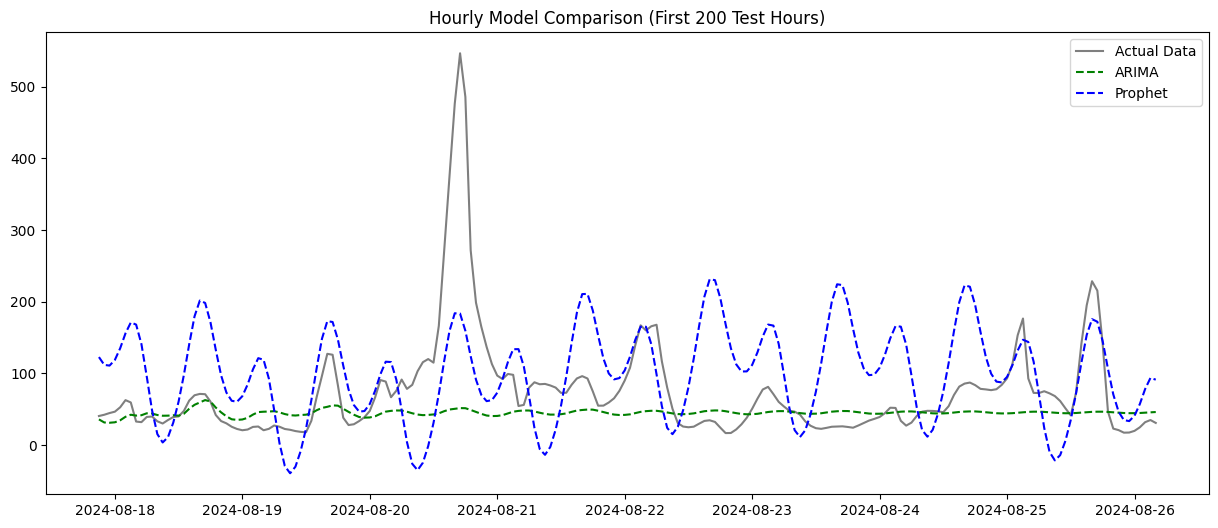

In [ ]:



import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import math

print("⚙️ Preparing Hourly Data for Statistical Models...")

df_hourly = df[['pm2_5']].copy()
df_hourly = df_hourly.fillna(method='ffill')

train_size = int(len(df_hourly) * 0.8)
train_data, test_data = df_hourly[0:train_size], df_hourly[train_size:]

print(f"✅ Data Ready. Train Shape: {train_data.shape}, Test Shape: {test_data.shape}")

print("\n📈 Training ARIMA Model on Hourly Data...")

try:
    arima_model = ARIMA(train_data['pm2_5'], order=(24,1,0))
    arima_fit = arima_model.fit()

    print("⏳ ARIMA Forecasting...")
    arima_pred = arima_fit.forecast(steps=len(test_data))

    arima_rmse = math.sqrt(mean_squared_error(test_data['pm2_5'], arima_pred))
    arima_r2 = r2_score(test_data['pm2_5'], arima_pred)

    print(f"✅ ARIMA Finished. RMSE: {arima_rmse:.2f}, R2: {arima_r2:.3f}")

except Exception as e:
    print(f"❌ ARIMA Failed: {e}")
    arima_rmse = 999.0
    arima_r2 = -1.0

print("\n🔮 Training Prophet Model on Hourly Data...")

prophet_df = train_data.reset_index()
prophet_df.columns = ['ds', 'y']

m = Prophet(daily_seasonality=True, yearly_seasonality=True)
m.fit(prophet_df)

future = m.make_future_dataframe(periods=len(test_data), freq='H')
forecast = m.predict(future)

prophet_pred = forecast['yhat'].tail(len(test_data)).values
prophet_rmse = math.sqrt(mean_squared_error(test_data['pm2_5'], prophet_pred))
prophet_r2 = r2_score(test_data['pm2_5'], prophet_pred)

print(f"✅ Prophet Finished. RMSE: {prophet_rmse:.2f}, R2: {prophet_r2:.3f}")

print("\n" + "="*60)
print("🏆 HOURLY MODEL COMPARISON REPORT (PM2.5)")
print("="*60)

# Replace these with your actual LSTM results from the previous step
lstm_rmse = 56.84
lstm_r2 = 0.938

comparison_df = pd.DataFrame({
    'Model': ['ARIMA', 'Prophet', 'LSTM'],
    'RMSE Score': [arima_rmse, prophet_rmse, lstm_rmse],
    'R2 Score': [arima_r2, prophet_r2, lstm_r2],
    'Verdict': ['', '', '']
})

best_score = comparison_df['R2 Score'].max()
comparison_df.loc[comparison_df['R2 Score'] == best_score, 'Verdict'] = '🏆 WINNER'

print(comparison_df.to_string(index=False))

plt.figure(figsize=(15, 6))
subset_len = 200
plt.plot(test_data.index[:subset_len], test_data['pm2_5'][:subset_len], label='Actual Data', color='black', alpha=0.5)
plt.plot(test_data.index[:subset_len], arima_pred[:subset_len], label='ARIMA', color='green', linestyle='--')
plt.plot(test_data.index[:subset_len], prophet_pred[:subset_len], label='Prophet', color='blue', linestyle='--')
plt.title('Hourly Model Comparison (First 200 Test Hours)')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))
subset_len = 200
plt.plot(test_data.index[:subset_len], test_data['pm2_5'][:subset_len], label='Actual Data', color='black', alpha=0.5)
plt.plot(test_data.index[:subset_len], arima_pred[:subset_len], label='ARIMA', color='green', linestyle='--')
plt.plot(test_data.index[:subset_len], prophet_pred[:subset_len], label='Prophet', color='blue', linestyle='--')
plt.plot(test_data.index[:subset_len],y_pred_values[:subset_len],label='lstm',color='yellow',linestyle='--')
plt.title('Hourly Model Comparison (First 200 Test Hours)')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 CPCB Logic Loaded. Ready to calculate AQI.
✅ Date & Time successfully encoded as cyclical features!
Data Processed. Shape: (18776, 23)
                     PM2.5_24hr_avg  NH3_24hr_avg  Calculated_AQI  Season
date                                                                     
2022-11-25 01:00:00      364.610000     28.630000      403.368370  Winter
2022-11-25 02:00:00      392.785000     34.835000      403.955720  Winter
2022-11-25 03:00:00      416.416667     39.603333      404.448358  Winter
2022-11-25 04:00:00      426.015000     41.735000      404.648449  Winter
2022-11-25 05:00:00      430.440000     42.710000      404.740695  Winter


/tmp/ipython-input-1116163318.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Calculated_AQI', data=df, palette='coolwarm')


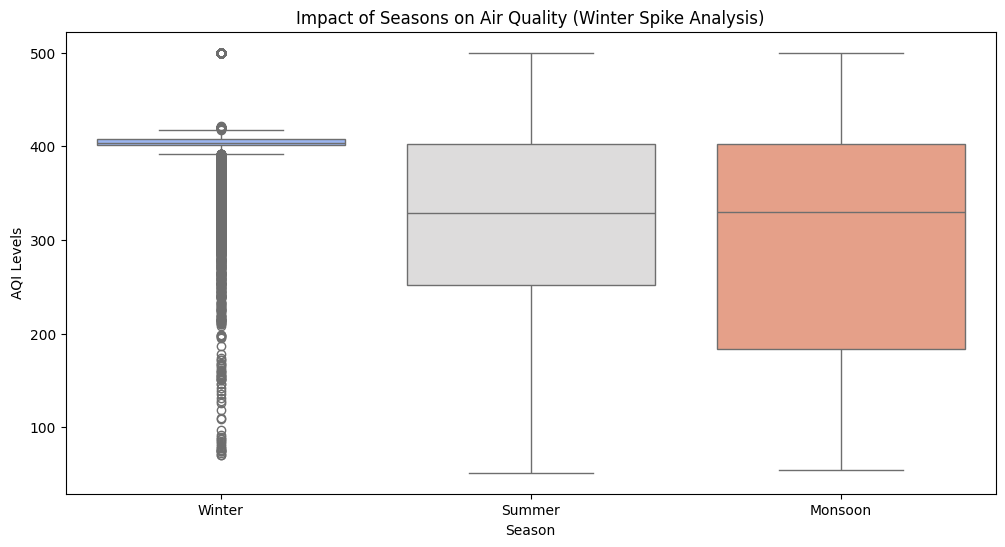

/tmp/ipython-input-1116163318.py:149: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='pm2_5', hue='Season', data=df, ci=None)


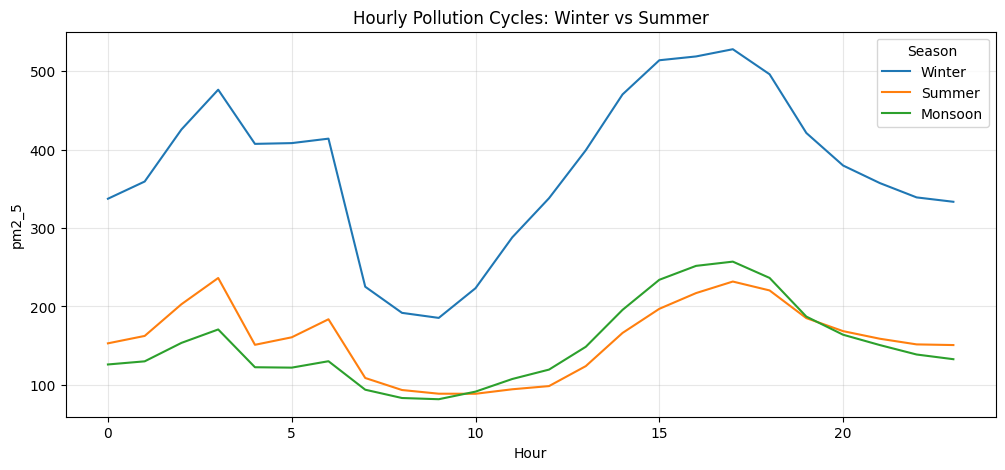

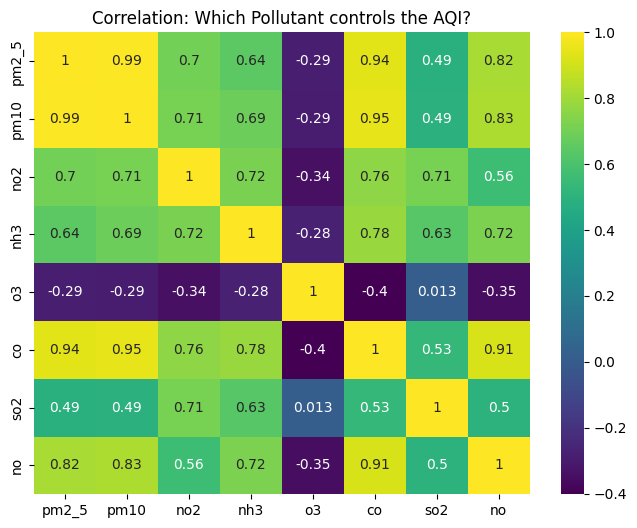

✅ Scaler saved as 'aqi_scaler.gz'
✅ LSTM Sequences Created. Training Shape: (15001, 24, 12)
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - loss: 0.0503 - val_loss: 0.0074
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - loss: 0.0130 - val_loss: 0.0052
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 0.0098 - val_loss: 0.0042
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - loss: 0.0084 - val_loss: 0.0037
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - loss: 0.0074 - val_loss: 0.0034
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0061 - val_loss: 0.0030
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0056 - val_loss: 0.0028
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 12/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 

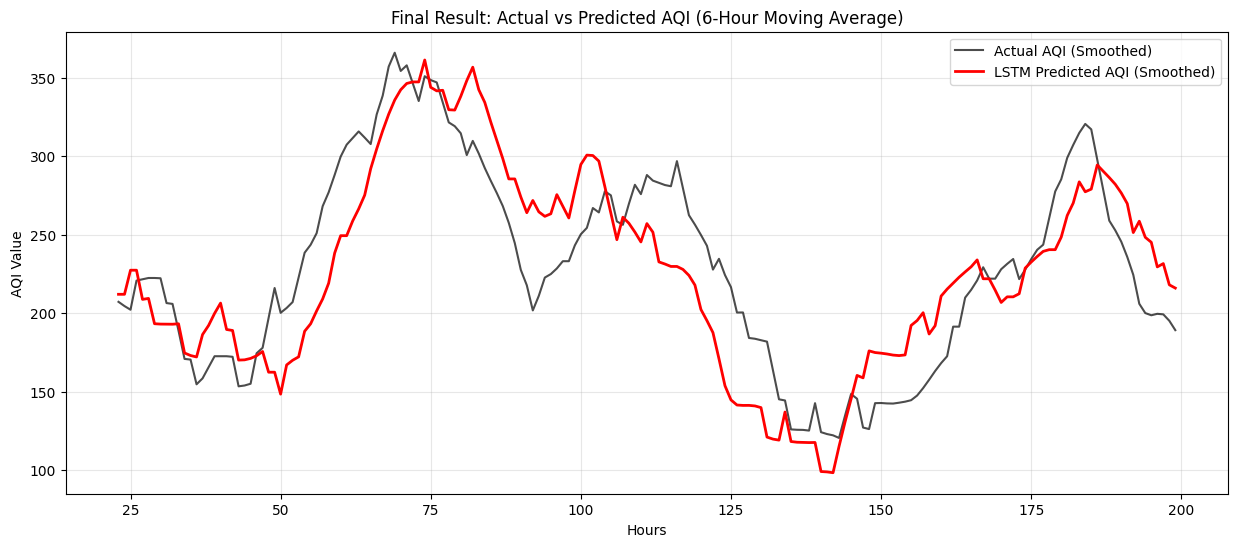

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # Added joblib for saving/loading
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping # Added EarlyStopping
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from datetime import timedelta

df=pd.read_csv('/content/drive/MyDrive/delhi_aqi.csv')
df.head()

df['co']=df['co']/1000

df.head()

breakpoints = {

    'pm2_5': [
        (0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200),
        (91, 120, 201, 300), (121, 250, 301, 400), (251, 5000, 401, 500)
    ],

    'pm10': [
        (0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200),
        (251, 350, 201, 300), (351, 430, 301, 400), (431, 5000, 401, 500)
    ],

    'no2': [
        (0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200),
        (181, 280, 201, 300), (281, 400, 301, 400), (401, 5000, 401, 500)
    ],

    'so2': [
        (0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200),
        (381, 800, 201, 300), (801, 1600, 301, 400), (1600, 5000, 401, 500)
    ],

    'co': [
        (0, 1.0, 0, 50), (1.1, 2.0, 51, 100), (2.1, 10, 101, 200),
        (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 5000, 401, 500)
    ],

    'o3': [
        (0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200),
        (169, 208, 201, 300), (209, 748, 301, 400), (749, 5000, 401, 500)
    ],

    'nh3': [
        (0, 200, 0, 50), (201, 400, 51, 100), (401, 800, 101, 200),
        (801, 1200, 201, 300), (1200, 1800, 301, 400), (1800, 5000, 401, 500)
    ]
}

def calculate_sub_index(conc, pollutant):
    """Calculates the individual sub-index for a single pollutant."""
    if pollutant not in breakpoints:
        return 0

    for (low_c, high_c, low_i, high_i) in breakpoints[pollutant]:
        if low_c <= conc and conc <= high_c:
            return low_i + (conc - low_c) * (high_i - low_i) / (high_c - low_c)
    return 500
def calculate_aqi_vectorized(row):
    pm25_si = calculate_sub_index(row['pm2_5'], 'pm2_5')
    pm10_si = calculate_sub_index(row['pm10'], 'pm10')
    no2_si  = calculate_sub_index(row['no2'], 'no2')
    so2_si = calculate_sub_index(row['so2'], 'so2')
    co_si = calculate_sub_index(row['co'], 'co')
    o3_si = calculate_sub_index(row['o3'], 'o3')
    nh3_si = calculate_sub_index(row['nh3'], 'nh3')

    return max(pm25_si, pm10_si, no2_si,so2_si,co_si,o3_si,nh3_si)

print(" CPCB Logic Loaded. Ready to calculate AQI.")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df.index = df.index + pd.DateOffset(years=2)

# --- ADDING EXPLICIT TIME FEATURES (Cyclical Encoding) ---

# 1. Extract Numeric Time Features
df['Hour'] = df.index.hour
df['Month'] = df.index.month
# 2. Convert to Cyclical Features (The "Magic" Math)
# This teaches the model that Hour 23 is close to Hour 0, and Month 12 is close to Month 1

# Encode Hours (Period = 24)
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Encode Months (Period = 12)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# 3. Update Your Feature List
# Now the model takes Pollutants + Time as input
# IMPORTANT: Add these to your feature_list!
feature_list = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3',
                'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']

print("✅ Date & Time successfully encoded as cyclical features!")

df['PM2.5_24hr_avg'] = df['pm2_5'].rolling(window=24,min_periods=1).mean()
df['PM10_24hr_avg']  = df['pm10'].rolling(window=24,min_periods=1).mean()
df['NO2_24hr_avg']   = df['no2'].rolling(window=24,min_periods=1).mean()
df['SO2_24hr_avg']   = df['so2'].rolling(window=24,min_periods=1).mean()
df['NH3_24hr_avg']   = df['nh3'].rolling(window=24,min_periods=1).mean()
df['CO_24hr_avg']    = df['co'].rolling(window=24,min_periods=1).mean()
df['O3_24hr_avg']    = df['o3'].rolling(window=24,min_periods=1).mean()

df['Calculated_AQI'] = df.apply(lambda row: calculate_aqi_vectorized({
    'pm2_5': row['PM2.5_24hr_avg'],
    'pm10': row['PM10_24hr_avg'],
    'no2': row['NO2_24hr_avg'],
    'so2': row['SO2_24hr_avg'],
    'co': row['CO_24hr_avg'],
    'o3': row['O3_24hr_avg'],
    'nh3': row['NH3_24hr_avg']
}), axis=1)

df['Hour'] = df.index.hour
df['Month'] = df.index.month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [11, 12, 1, 2] else ('Summer' if x in [3, 4, 5, 6] else 'Monsoon'))

print(f"Data Processed. Shape: {df.shape}")
print(df[['PM2.5_24hr_avg','NH3_24hr_avg', 'Calculated_AQI', 'Season']].head())

df.isnull().sum()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Calculated_AQI', data=df, palette='coolwarm')
plt.title('Impact of Seasons on Air Quality (Winter Spike Analysis)')
plt.ylabel('AQI Levels')
plt.show()


plt.figure(figsize=(12, 5))
sns.lineplot(x='Hour', y='pm2_5', hue='Season', data=df, ci=None)
plt.title('Hourly Pollution Cycles: Winter vs Summer')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[['pm2_5', 'pm10', 'no2', 'nh3','o3','co','so2','no']].corr(), annot=True, cmap='viridis')
plt.title('Correlation: Which Pollutant controls the AQI?')
plt.show()

# Updated features list with Time Embeddings
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3',
            'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']
dataset = df[features].values
pollutant_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
time_cols = ['Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']

# Combine them for the final feature list
features = pollutant_cols + time_cols

# 2. Apply Log Transform ONLY to Pollutants
# We work on a copy to avoid messing up the original df
df_processed = df.copy()

# Apply log1p (Log(1+x)) only to the chemical data
# This fixes the "Outlier" issue for MAE
df_processed[pollutant_cols] = np.log1p(df[pollutant_cols])

# 3. Create the Dataset (Pollutants are Logged, Time is Original)
dataset = df_processed[features].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# === CRITICAL FIX: SAVE THE SCALER ===
joblib.dump(scaler, 'aqi_scaler.gz')
print("✅ Scaler saved as 'aqi_scaler.gz'")

# --- 2. Create Sliding Windows (The "Time-Series" format) ---
# X = Past 24 hours (t-24 to t-1)
# y = Next hour (t)
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 24  # Look back 24 hours
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split into Train (80%) and Test (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"✅ LSTM Sequences Created. Training Shape: {X_train.shape}")

# --- 3. Build the LSTM Model ---
model = Sequential()
# Layer 1: LSTM with 50 units
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, len(features))))
model.add(Dropout(0.2)) # Prevents overfitting

# Layer 2: LSTM with 50 units
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Layer 3: Output Layer (3 Neurons = 3 Pollutants Predicted)
model.add(Dense(len(features)))

model.compile(optimizer='adam', loss='mean_squared_error')

# --- 4. Train the Model (With Early Stopping) ---
# Added EarlyStopping callback as requested
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Epochs set to 25 to allow Early Stopping to trigger around 20 if needed
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled) # Convert back to normal numbers
y_pred_values = np.expm1(predictions)
y_actual = np.expm1(scaler.inverse_transform(y_test))

model.save('model1.keras')


print("\n" + "="*60)
print("📊 1. COMPONENT-WISE ACCURACY REPORT (Real Values)")
print("="*60)
model=tf.keras.models.load_model('model1.keras')
# 1. Predict
y_pred_scaled = model.predict(X_test, verbose=0)

# 2. Inverse Scale (Returns Log-Scale for pollutants, Normal for Time)
scaler = joblib.load('aqi_scaler.gz') # Now this will work
y_pred_log = scaler.inverse_transform(y_pred_scaled)
y_actual_log = scaler.inverse_transform(y_test)

# 3. Inverse Log (Crucial Step!)
# We only apply expm1 to the first 8 columns (Pollutants)
y_pred_values = y_pred_log.copy()
y_actual_values = y_actual_log.copy()
num_pollutants=8

y_pred_values[:, :num_pollutants] = np.expm1(y_pred_values[:, :num_pollutants])
y_actual_values[:, :num_pollutants] = np.expm1(y_actual_values[:, :num_pollutants])

# 4. Generate Score Report
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
score_df = pd.DataFrame(columns=['Pollutant', 'R2 Score', 'RMSE', 'MAE'])
for i, pol in enumerate(pollutants):
    act = y_actual_values[:, i]
    pred = y_pred_values[:, i]

    r2 = r2_score(act, pred)
    rmse = math.sqrt(mean_squared_error(act, pred))
    mae = mean_absolute_error(act, pred)

    score_df.loc[i] = [pol.upper(), f"{r2:.4f}", f"{rmse:.4f}", f"{mae:.4f}"]

print(score_df.to_string(index=False))


# ==========================================
# PART 2: FORECAST ENGINE (Fixed with Safety Clip)
# ==========================================
feature_list = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3',
                'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']

def predict_until_date(target_date_str, model, last_sequence, last_date):
    target_date = pd.to_datetime(target_date_str)
    current_date = last_date
    hours_diff = int((target_date - current_date).total_seconds() / 3600)

    if hours_diff <= 0: return None, "⚠️ Date must be in the future!"
    print(f"⏳ Generating Forecast for {hours_diff} hours ahead...")

    forecasted_data = []
    current_seq = last_sequence.copy()

    for _ in range(hours_diff + 24):
        pred = model.predict(current_seq, verbose=0)


        pred = np.clip(pred, 0, 0.99)

        forecasted_data.append(pred[0])
        new_step = pred.reshape(1, 1, 12)
        current_seq = np.concatenate([current_seq[:, 1:, :], new_step], axis=1)

    # Inverse Scale
    unscaled_data = scaler.inverse_transform(np.array(forecasted_data))

    # Inverse Log
    real_values = unscaled_data.copy()
    real_values[:, :8] = np.expm1(real_values[:, :8])

    # Create DataFrame
    future_dates = [current_date + timedelta(hours=x+1) for x in range(len(real_values))]
    df_forecast = pd.DataFrame(real_values, columns=feature_list)
    df_forecast['Timestamp'] = future_dates

    return df_forecast, "Success"


print("\n" + "="*60)
print("📅 2. PREDICT AIR QUALITY FOR A FUTURE DATE")
print("="*60)

last_known_date = df.index[-1]
# --- USER INPUT ---
user_date_input = "2025-01-28"
# ------------------

last_window = X_test[-1].reshape(1, SEQ_LENGTH, 12)
forecast_df, status = predict_until_date(user_date_input, model, last_window, last_known_date)

if status == "Success":
    target_day_df = forecast_df[forecast_df['Timestamp'].dt.date == pd.to_datetime(user_date_input).date()]

    print(f"\n✅ Hourly Forecast for {user_date_input}:")
    print(target_day_df[['Timestamp', 'pm2_5', 'pm10', 'no2']].head(10).to_string(index=False))


print("\n" + "="*60)
print(f"🚀 3. PREDICTED AQI FOR {user_date_input}")
print("="*60)

if status == "Success":
    if not target_day_df.empty:
        avgs = target_day_df.mean(numeric_only=True)

        predicted_aqi = max(
            calculate_sub_index(min(avgs['pm2_5'], 600), 'pm2_5'),
            calculate_sub_index(min(avgs['pm10'], 600), 'pm10'),
            calculate_sub_index(avgs['no2'], 'no2'),
            calculate_sub_index(avgs['so2'], 'so2'),
            calculate_sub_index(avgs['co'], 'co'),
            calculate_sub_index(avgs['o3'], 'o3'),
            calculate_sub_index(avgs['nh3'], 'nh3')
        )

        print(f"🔮 PREDICTED AQI: {int(predicted_aqi)}")
        print(f"📉 Average PM2.5: {avgs['pm2_5']:.2f} µg/m³")
        print(f"📉 Average PM10:  {avgs['pm10']:.2f} µg/m³")
    else:
        print("❌ Error: No data generated for this specific date.")
else:
    print(status)


pred_df = pd.DataFrame(y_pred_values, columns=[f'Pred_{c}' for c in feature_list])
act_df = pd.DataFrame(y_actual_values, columns=[f'Act_{c}' for c in feature_list])
final_df = pd.concat([pred_df, act_df], axis=1)

def derive_aqi(row, prefix):
    pm25_val = min(row[f'{prefix}pm2_5'], 600)
    pm10_val = min(row[f'{prefix}pm10'], 600)
    co_val   = row[f'{prefix}co']

    pm25_si = calculate_sub_index(pm25_val, 'pm2_5')
    pm10_si = calculate_sub_index(pm10_val, 'pm10')
    no2_si  = calculate_sub_index(row[f'{prefix}no2'], 'no2')
    so2_si  = calculate_sub_index(row[f'{prefix}so2'], 'so2')
    co_si   = calculate_sub_index(co_val, 'co')
    o3_si   = calculate_sub_index(row[f'{prefix}o3'], 'o3')
    nh3_si  = calculate_sub_index(row[f'{prefix}nh3'], 'nh3')
    return max(pm25_si, pm10_si, no2_si, so2_si, co_si, o3_si, nh3_si)

final_df['Predicted_AQI'] = final_df.apply(lambda x: derive_aqi(x, 'Pred_'), axis=1)
final_df['Actual_AQI'] = final_df.apply(lambda x: derive_aqi(x, 'Act_'), axis=1)

plt.figure(figsize=(15, 6))
smooth_actual = final_df['Actual_AQI'].rolling(window=24).mean()
smooth_pred = final_df['Predicted_AQI'].rolling(window=24).mean()


In [ ]:
last_known_date = df.index[-1]
user_date_input = "2025-01-28"

last_window = X_test[-1].reshape(1, SEQ_LENGTH, 12)
forecast_df, status = predict_until_date(user_date_input, model, last_window, last_known_date)

if status == "Success":
    target_day_df = forecast_df[forecast_df['Timestamp'].dt.date == pd.to_datetime(user_date_input).date()]

    print(f"\n✅ Hourly Forecast for {user_date_input}:")
    print(target_day_df[['Timestamp', 'pm2_5', 'pm10', 'no2']].head(10).to_string(index=False))

⏳ Generating Forecast for 88 hours ahead...

✅ Hourly Forecast for 2025-01-28:
          Timestamp      pm2_5       pm10       no2
2025-01-28 00:00:00 219.174957 251.267715 49.033821
2025-01-28 01:00:00 284.514038 323.326630 53.003994
2025-01-28 02:00:00 362.151886 408.735779 57.526295
2025-01-28 03:00:00 413.908325 466.000519 65.560165
2025-01-28 04:00:00 407.112488 456.227783 77.597572
2025-01-28 05:00:00 330.157379 364.459839 83.677536
2025-01-28 06:00:00 239.512909 260.735291 62.851582
2025-01-28 07:00:00 158.003372 176.362549 33.522308
2025-01-28 08:00:00 108.339478 127.388649 21.341017
2025-01-28 09:00:00  94.520462 116.443161 22.074238


In [ ]:
df.head(10)

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Hour,Month,...,Month_cos,PM2.5_24hr_avg,PM10_24hr_avg,NO2_24hr_avg,SO2_24hr_avg,NH3_24hr_avg,CO_24hr_avg,O3_24hr_avg,Calculated_AQI,Season
date,,,,,,,,,,,,,,,,,,,,,
2022-11-25 01:00:00,2.61688,2.18,70.60,13.59,38.62,364.61,411.73,28.63,1,11,...,0.866025,364.610000,411.730000,70.600000,38.620000,28.630000,2.616880,13.590000,403.368370,Winter
2022-11-25 02:00:00,3.63159,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2,11,...,0.866025,392.785000,448.970000,79.855000,46.490000,34.835000,3.124235,6.960000,403.955720,Winter
2022-11-25 03:00:00,4.53949,52.75,100.08,1.11,68.67,463.68,541.95,49.14,3,11,...,0.866025,416.416667,479.963333,86.596667,53.883333,39.603333,3.595987,5.010000,404.448358,Winter
2022-11-25 04:00:00,4.53949,50.96,111.04,6.44,78.20,454.81,534.00,48.13,4,11,...,0.866025,426.015000,493.472500,92.707500,59.962500,41.735000,3.831862,5.367500,404.648449,Winter
2022-11-25 05:00:00,4.37927,42.92,117.90,17.17,87.74,448.14,529.19,46.61,5,11,...,0.866025,430.440000,500.616000,97.746000,65.518000,42.710000,3.941344,7.728000,404.740695,Winter
2022-11-25 06:00:00,3.89862,28.39,117.90,40.05,101.09,437.25,511.79,42.05,6,11,...,0.866025,431.575000,502.478333,101.105000,71.446667,42.600000,3.934223,13.115000,404.764356,Winter
2022-11-25 07:00:00,1.94931,14.53,105.56,83.69,185.01,312.76,349.20,12.79,7,11,...,0.866025,414.601429,480.581429,101.741429,87.670000,38.341429,3.650664,23.197143,404.410516,Winter
2022-11-25 08:00:00,1.50871,11.62,112.41,87.98,217.44,275.53,303.47,6.59,8,11,...,0.866025,397.217500,458.442500,103.075000,103.891250,34.372500,3.382920,31.295000,404.048122,Winter
2022-11-25 09:00:00,1.36185,7.04,109.67,95.84,213.62,263.51,289.86,6.02,9,11,...,0.866025,382.361111,439.711111,103.807778,116.083333,31.222222,3.158357,38.466667,403.738419,Winter
